In [2]:
N = (14 + 4) % 5 + 1
N

4

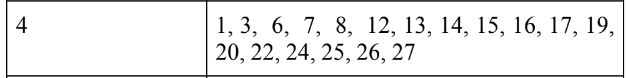

### 1. Виведіть перші 8 рядків набору даних.

In [3]:
import pandas as pd

file_path = "NationalNames.csv"
data = pd.read_csv(file_path)

data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### 3. Отримайте імена стовпців набору даних.

In [4]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

column_names = data.columns
print(column_names)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


### 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.

In [5]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()

unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()

print(f"F: {unique_female_names}")
print(f"M: {unique_male_names}")

F: 64911
M: 39199


### 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

In [6]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

male_names_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')]

top_5_male_names = male_names_2010.sort_values(by='Count', ascending=False).head(5)

print(top_5_male_names)

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


### 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне).

In [7]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

year = 1947

data_year = data[data['Year'] == year]

most_popular_name = data_year.loc[data_year['Count'].idxmax()]

print(f"The name is '{most_popular_name['Name']}' in {most_popular_name['Year']}")

The name is 'Linda' in 1947


### 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році).

In [8]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

unique_names_per_year = data.groupby('Year')['Name'].nunique()

year_with_most_unique_names = unique_names_per_year.idxmax()

data_most_unique_year = data[data['Year'] == year_with_most_unique_names]

most_popular_name = data_most_unique_year.loc[data_most_unique_year['Count'].idxmax()]

print(f"The most popular name in {year_with_most_unique_names} is '{most_popular_name['Name']}'")

The most popular name in 2008 is 'Jacob'


### 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен.

In [9]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]

most_popular_year = jacob_female.loc[jacob_female['Count'].idxmax()]

print(most_popular_year)

Id        1455557
Name        Jacob
Year         2004
Gender          F
Count         171
Name: 1455556, dtype: object


### 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена).

In [11]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

pivot = data.pivot_table(index='Year', columns='Gender', values='Name', aggfunc=set)

pivot['Gender_neutral_names'] = pivot.apply(lambda row: len(row['F'].intersection(row['M'])), axis=1)

result = pivot['Gender_neutral_names'].idxmax()
max_count = pivot['Gender_neutral_names'].max()

print(f"Year: {result}, Gender_neutral_names: {max_count}")

Year: 2008, Gender_neutral_names: 2557


### 15. Знайдіть загальну кількість народжень за рік.

In [12]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

total_births_per_year = data.groupby('Year')['Count'].sum()

print(total_births_per_year.head())

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64


### 16. Знайдіть рік, коли народилося найбільше дітей.

In [13]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

total_births_per_year = data.groupby('Year')['Count'].sum()

year_with_most_births = total_births_per_year.idxmax()

print(f"The year with the most births is: {year_with_most_births}")

The year with the most births is: 1957


### 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.

In [14]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

grouped_data = data.groupby(['Year', 'Gender']).sum().reset_index()

pivot_table = grouped_data.pivot(index='Year', columns='Gender', values='Count')

print(pivot_table.head())

Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


### 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

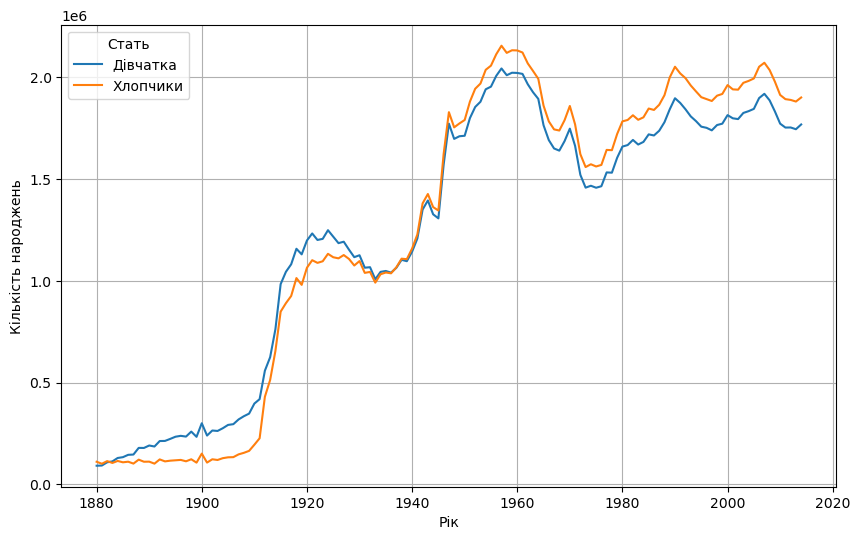

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("NationalNames.csv")

births_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

births_per_year.plot(kind='line', figsize=(10, 6))
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend(title='Стать', labels=['Дівчатка', 'Хлопчики'])
plt.grid(True)
plt.show()

### 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців).

In [38]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

neutral_names = data.groupby('Name')['Gender'].nunique()

neutral_names = neutral_names[neutral_names > 1]

count_neutral_names = len(neutral_names)

print("Кількість гендерно нейтральних імен:", count_neutral_names)

Кількість гендерно нейтральних імен: 10221


### 22. Підрахуйте скільки років проводилось спостереження.

In [39]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

earliest_year = data['Year'].min()
latest_year = data['Year'].max()

observation_years = latest_year - earliest_year + 1

print(f"'Спостереження проводилось {observation_years} років'")

'Спостереження проводилось 135 років'


### 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів).

In [40]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

name_counts = data.groupby('Name')['Count'].sum()

unpopular_names = name_counts[name_counts < 100]

most_popular_of_unpopular_name = unpopular_names.idxmax()
max_count = unpopular_names.max()

print(f"Найбільш популярне з непопулярних імен це - {most_popular_of_unpopular_name}. Ним назвали {max_count} разів")

Найбільш популярне з непопулярних імен це - Aayana. Ним назвали 99 разів


### 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

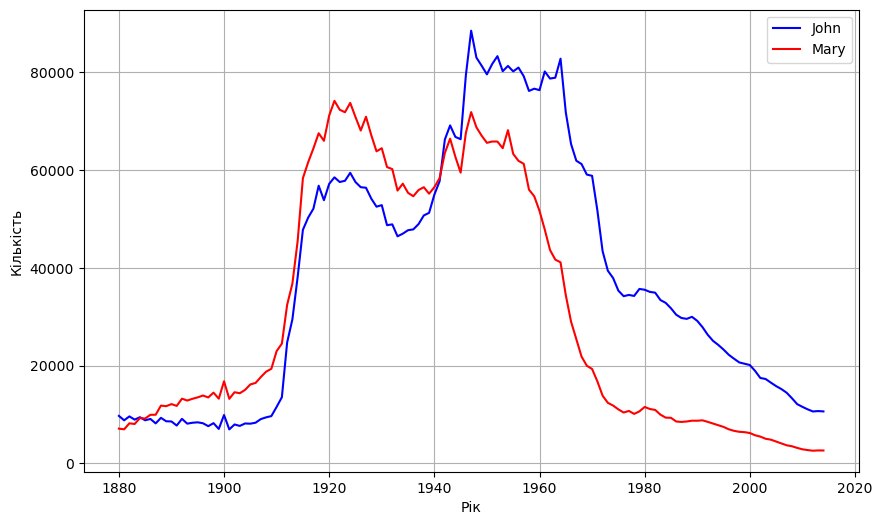

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("NationalNames.csv")

john_data = data[data['Name'] == 'John']
mary_data = data[data['Name'] == 'Mary']

john_counts = john_data.groupby('Year')['Count'].sum()
mary_counts = mary_data.groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))

plt.plot(john_counts.index, john_counts.values, label='John', color='blue')

plt.plot(mary_counts.index, mary_counts.values, label='Mary', color='red')

plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)

plt.show()

### 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

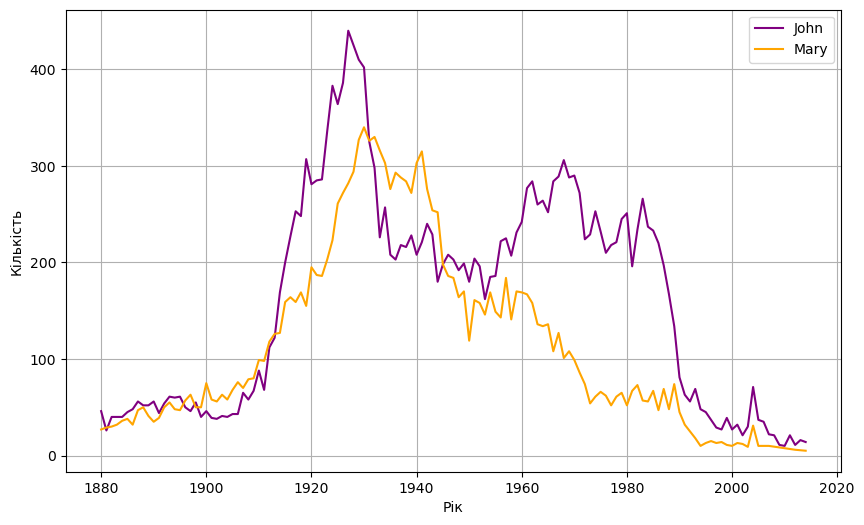

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NationalNames.csv')

female_john_data = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
male_mary_data = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]

female_john_counts = female_john_data.groupby('Year')['Count'].sum()
male_mary_counts = male_mary_data.groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))

plt.plot(female_john_counts.index, female_john_counts.values, label='John', color='purple')

plt.plot(male_mary_counts.index, male_mary_counts.values, label='Mary', color='orange')

plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)

plt.show()

### 27. Знайти найпопулярніші імена в кожному році.

In [45]:
import pandas as pd

date = pd.read_csv('NationalNames.csv')

name_counts = date.groupby(['Name', 'Year'])['Count'].sum()

most_popular_names_in_each_year = name_counts.groupby('Year').idxmax()

print(most_popular_names_in_each_year)

Year
1880        (John, 1880)
1881        (John, 1881)
1882        (John, 1882)
1883        (John, 1883)
1884        (John, 1884)
              ...       
2010    (Isabella, 2010)
2011      (Sophia, 2011)
2012      (Sophia, 2012)
2013      (Sophia, 2013)
2014        (Emma, 2014)
Name: Count, Length: 135, dtype: object
